## Observations and Insights

In [ ]:
According to the scatter plot and linear regression model for the Capomulin regimen, it seems that as a mouse's weight increases, its tumor volume also increases. There is also a strong postive correlation between Weight and Average Tumor Volume with the correlation coefficient being 0.84.

Of the four most promising treatment regimens, it appears that Capomolin and Ramicane were the most successful, accoridng to the boxplots. They seem to retain the smallest spread of tumor volumes as well as the smallest size of mouse tumors.

The gender distribution of mice for this study appears to be almost equal with female mice occupying 49.8% and males occupying 50.2%.

## Dependencies and starter code

In [41]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_mean.rename(columns = {'Tumor Volume (mm3)': 'Mean Tumor'}, inplace = True)
tumor_mean.head()

tumor_median = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().reset_index()
tumor_median.rename(columns = {'Tumor Volume (mm3)': 'Median Tumor'}, inplace = True)
tumor_median.head()

tumor_var = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().reset_index()
tumor_var.rename(columns = {'Tumor Volume (mm3)': 'Var Tumor'}, inplace = True)
tumor_var.head()

tumor_std = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().reset_index()
tumor_std.rename(columns = {'Tumor Volume (mm3)': 'STD Tumor'}, inplace = True)
tumor_std.head()

tumor_sem = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().reset_index()
tumor_sem.rename(columns = {'Tumor Volume (mm3)': 'SEM Tumor'}, inplace = True)
tumor_sem.head()

#merge all these into 1 table
summary_table = pd.merge(tumor_mean, tumor_median, how='outer', on='Drug Regimen')
summary_table = pd.merge(summary_table, tumor_var, how='outer', on='Drug Regimen')
summary_table = pd.merge(summary_table, tumor_std, how='outer', on='Drug Regimen')
summary_table = pd.merge(summary_table, tumor_sem, how='outer', on='Drug Regimen')
summary_table.set_index(['Drug Regimen'])

,Mean Tumor,Median Tumor,Var Tumor,STD Tumor,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


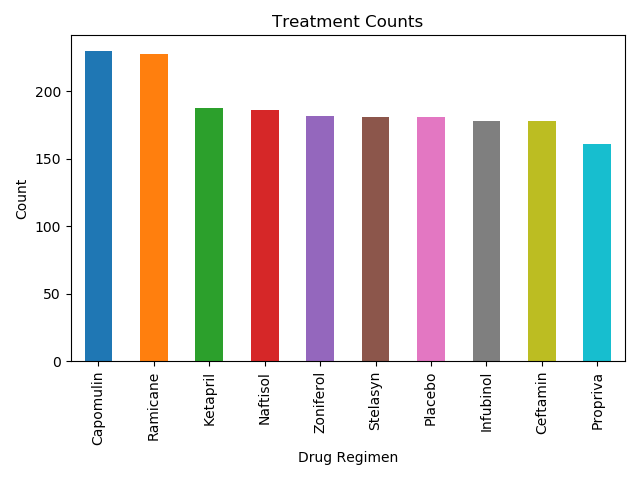

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count = combined_data['Drug Regimen'].value_counts()
ax = drug_count.plot(kind = 'bar', color = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], title = 'Treatment Counts')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Count')
plt.tight_layout()

<IPython.core.display.Javascript object>


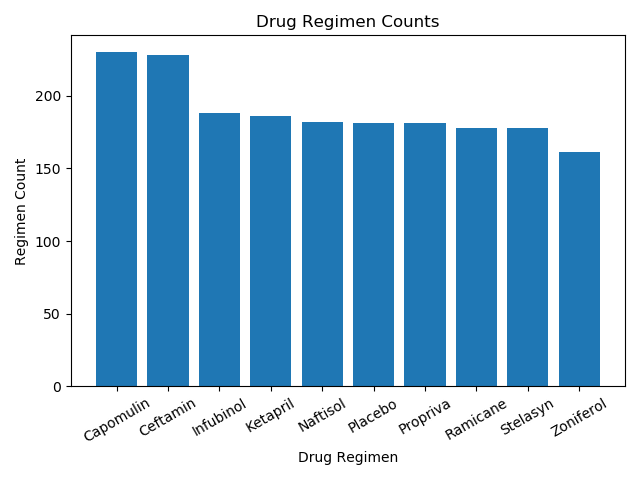

In [27]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = summary_table['Drug Regimen']
y = combined_data['Drug Regimen'].value_counts()

plt.bar(x,y)
plt.xticks(rotation=30)
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Count")
plt.title("Drug Regimen Counts")
plt.tight_layout()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.


#Create Dataframe containing information related only to Capomulin, Ramicane, Infubinol, and Ceftamin
promising_treatment_df = combined_data.loc[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#Calculate final tumor volume for each mouse ID for Capomulin, Ramicane, Infubinol, and Ceftamin
tum_vol_promising_treatment = promising_treatment_df.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()

#Create Dataframe with Final Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin by MouseID 
final_tum_vol_mid_df = pd.DataFrame({"Final Tumor Volume (mm3)": tum_vol_promising_treatment})
final_tum_vol_mid_df

,,Final Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [29]:
#Calculate final tumor volume for Capomulin
promising_treatment_cap_df = combined_data.loc[combined_data["Drug Regimen"].isin(["Capomulin"])]
tum_vol_promising_treatment_cap = promising_treatment_cap_df.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()
tum_vol_promising_treatment_cap

Mouse ID  Drug Regimen
b128      Capomulin       38.982878
b742      Capomulin       38.939633
f966      Capomulin       30.485985
g288      Capomulin       37.074024
g316      Capomulin       40.159220
i557      Capomulin       47.685963
i738      Capomulin       37.311846
j119      Capomulin       38.125164
j246      Capomulin       38.753265
l509      Capomulin       41.483008
l897      Capomulin       38.846876
m601      Capomulin       28.430964
m957      Capomulin       33.329098
r157      Capomulin       46.539206
r554      Capomulin       32.377357
r944      Capomulin       41.581521
s185      Capomulin       23.343598
s710      Capomulin       40.728578
t565      Capomulin       34.455298
u364      Capomulin       31.023923
v923      Capomulin       40.658124
w150      Capomulin       39.952347
w914      Capomulin       36.041047
x401      Capomulin       28.484033
y793      Capomulin       31.896238
Name: Tumor Volume (mm3), dtype: float64

In [30]:
#Calculate final tumor volume for Ramicane
promising_treatment_ram_df = combined_data.loc[combined_data["Drug Regimen"].isin(["Ramicane"])]
tum_vol_promising_treatment_ram = promising_treatment_ram_df.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()
tum_vol_promising_treatment_ram

Mouse ID  Drug Regimen
a411      Ramicane        38.407618
a444      Ramicane        43.047543
a520      Ramicane        38.810366
a644      Ramicane        32.978522
c458      Ramicane        38.342008
c758      Ramicane        33.397653
d251      Ramicane        37.311236
e662      Ramicane        40.659006
g791      Ramicane        29.128472
i177      Ramicane        33.562402
i334      Ramicane        36.374510
j913      Ramicane        31.560470
j989      Ramicane        36.134852
k403      Ramicane        22.050126
m546      Ramicane        30.564625
n364      Ramicane        31.095335
q597      Ramicane        45.220869
q610      Ramicane        36.561652
r811      Ramicane        37.225650
r921      Ramicane        43.419381
s508      Ramicane        30.276232
u196      Ramicane        40.667713
w678      Ramicane        43.166373
y449      Ramicane        44.183451
z578      Ramicane        30.638696
Name: Tumor Volume (mm3), dtype: float64

In [31]:
#Calculate final tumor volume for Infubinol
promising_treatment_inf_df = combined_data.loc[combined_data["Drug Regimen"].isin(["Infubinol"])]
tum_vol_promising_treatment_inf = promising_treatment_inf_df.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()
tum_vol_promising_treatment_inf

Mouse ID  Drug Regimen
a203      Infubinol       67.973419
a251      Infubinol       65.525743
a577      Infubinol       57.031862
a685      Infubinol       66.083066
c139      Infubinol       72.226731
c326      Infubinol       36.321346
c895      Infubinol       60.969711
e476      Infubinol       62.435404
f345      Infubinol       60.918767
i386      Infubinol       67.289621
k483      Infubinol       66.196912
k804      Infubinol       62.117279
m756      Infubinol       47.010364
n671      Infubinol       60.165180
o809      Infubinol       55.629428
o813      Infubinol       45.699331
q132      Infubinol       54.656549
s121      Infubinol       55.650681
v339      Infubinol       46.250112
v719      Infubinol       54.048608
v766      Infubinol       51.542431
w193      Infubinol       50.005138
w584      Infubinol       58.268442
y163      Infubinol       67.685569
z581      Infubinol       62.754451
Name: Tumor Volume (mm3), dtype: float64

In [32]:
#Calculate final tumor volume for Ceftamin
promising_treatment_cef_df = combined_data.loc[combined_data["Drug Regimen"].isin(["Ceftamin"])]
tum_vol_promising_treatment_cef = promising_treatment_cef_df.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()
tum_vol_promising_treatment_cef

Mouse ID  Drug Regimen
a275      Ceftamin        62.999356
b447      Ceftamin        45.000000
b487      Ceftamin        56.057749
b759      Ceftamin        55.742829
f436      Ceftamin        48.722078
h531      Ceftamin        47.784682
j296      Ceftamin        61.849023
k210      Ceftamin        68.923185
l471      Ceftamin        67.748662
l490      Ceftamin        57.918381
l558      Ceftamin        46.784535
l661      Ceftamin        59.851956
l733      Ceftamin        64.299830
o287      Ceftamin        59.741901
p438      Ceftamin        61.433892
q483      Ceftamin        64.192341
t573      Ceftamin        45.000000
u149      Ceftamin        52.925348
u153      Ceftamin        45.000000
w151      Ceftamin        67.527482
x226      Ceftamin        45.000000
x581      Ceftamin        64.634949
x822      Ceftamin        61.386660
y769      Ceftamin        68.594745
y865      Ceftamin        64.729837
Name: Tumor Volume (mm3), dtype: float64

In [33]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Calculate IQR for Capomulin

quartiles = tum_vol_promising_treatment_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes for Capomulin is: {lowerq}")
print(f"The upper quartile of final tumor volumes for Capomulin is: {upperq}")
print(f"The interquartile of final tumor volumes for Capomulin is: {iqr}")
print(f"The the median of final tumor volumes for Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#No outliers identified

The lower quartile of final tumor volumes for Capomulin is: 32.37735684
The upper quartile of final tumor volumes for Capomulin is: 40.1592203
The interquartile of final tumor volumes for Capomulin is: 7.781863460000004
The the median of final tumor volumes for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [34]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Calculate IQR for Ramicane
quartiles = tum_vol_promising_treatment_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes for Ramicane is: {lowerq}")
print(f"The upper quartile of final tumor volumes for Ramicane is: {upperq}")
print(f"The interquartile of final tumor volumes for Ramicane is: {iqr}")
print(f"The the median of final tumor volumes for Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#No outliers identified

The lower quartile of final tumor volumes for Ramicane is: 31.56046955
The upper quartile of final tumor volumes for Ramicane is: 40.65900627
The interquartile of final tumor volumes for Ramicane is: 9.098536719999998
The the median of final tumor volumes for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [35]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Calculate IQR for Infubinol
quartiles = tum_vol_promising_treatment_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes for Ramicane is: {lowerq}")
print(f"The upper quartile of final tumor volumes for Ramicane is: {upperq}")
print(f"The interquartile of final tumor volumes for Ramicane is: {iqr}")
print(f"The the median of final tumor volumes for Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#One potential outlier identified

The lower quartile of final tumor volumes for Ramicane is: 54.04860769
The upper quartile of final tumor volumes for Ramicane is: 65.52574285
The interquartile of final tumor volumes for Ramicane is: 11.477135160000003
The the median of final tumor volumes for Ramicane is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [36]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Calculate IQR for Ceftamen
quartiles = tum_vol_promising_treatment_cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes for Ramicane is: {lowerq}")
print(f"The upper quartile of final tumor volumes for Ramicane is: {upperq}")
print(f"The interquartile of final tumor volumes for Ramicane is: {iqr}")
print(f"The the median of final tumor volumes for Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#No outliers identified

The lower quartile of final tumor volumes for Ramicane is: 48.72207785
The upper quartile of final tumor volumes for Ramicane is: 64.29983003
The interquartile of final tumor volumes for Ramicane is: 15.577752179999997
The the median of final tumor volumes for Ramicane is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


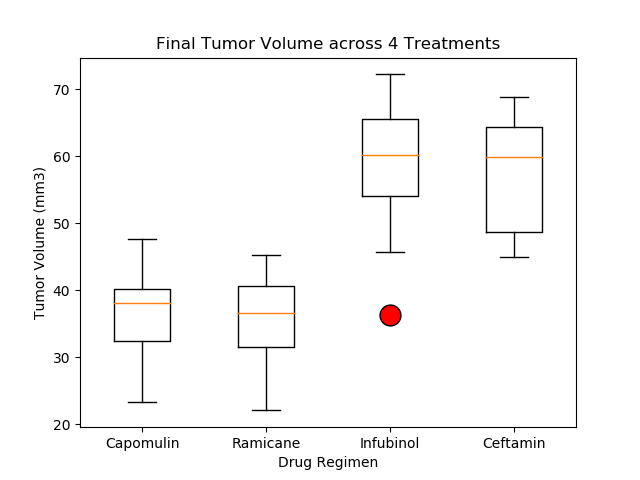

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Create boxplots for Capomulin, Ramicane, Infubinol, and Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume across 4 Treatments")
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_ylabel("Tumor Volume (mm3)")
flierprops = dict(marker='o', markerfacecolor='red', markersize=15, linestyle='none')
ax1.boxplot([tum_vol_promising_treatment_cap, tum_vol_promising_treatment_ram, tum_vol_promising_treatment_inf, tum_vol_promising_treatment_cef], flierprops=flierprops)
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


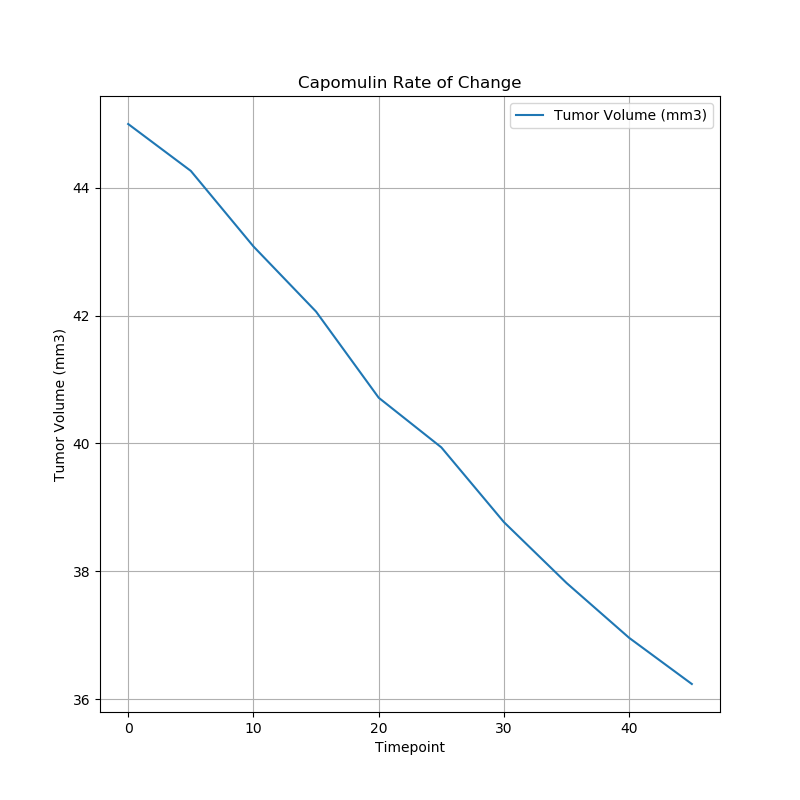

Text(0, 0.5, 'Tumor Volume (mm3)')

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_mean = combined_data.groupby(["Drug Regimen", "Timepoint"]).mean()
#combined_mean = combined_mean.loc[combined_mean['Drug Regimen'] == 'Capomulin']
combined_mean
combined_mean.reset_index(level = None, inplace = True)
combined_mean
Capomulin_Data = combined_mean.loc[combined_mean['Drug Regimen'] == 'Capomulin']

Capomulin_Data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin Rate of Change")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

<IPython.core.display.Javascript object>


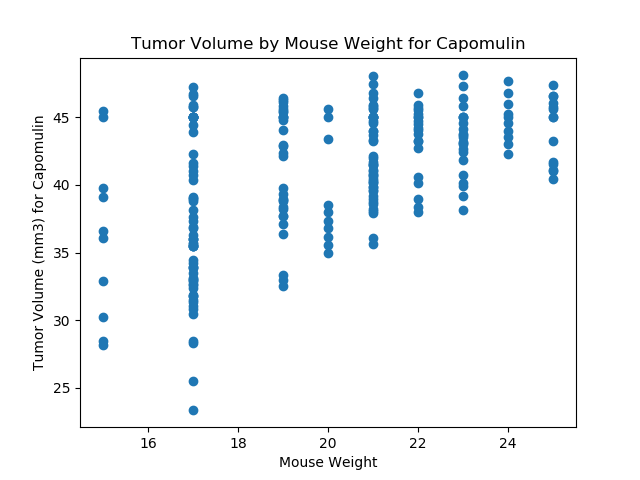

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Determine mouse weight for mice treated with Capomulin
mouse_weight = promising_treatment_cap_df["Weight (g)"]

#Determine tumor volume for mice treated with Capomulin
tumor_vol_cap = promising_treatment_cap_df["Tumor Volume (mm3)"]

#Create Scatterplot
x_values = mouse_weight
y_values = tumor_vol_cap
plt.title("Tumor Volume by Mouse Weight for Capomulin")
plt.scatter(x_values,y_values)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3) for Capomulin")
plt.show()

In [40]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = tumor_vol_cap
(slope, intercept, rvalue, pvalue, stderr) = lineregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")
plt.xlabel("Weight (g) of Mouse")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
plt.show()

NameError: name 'lineregress' is not defined